In [42]:
import numpy as np
from numpy import log10
import pandas as pd
import matplotlib.pyplot as plt
from pywt import wavedec, waverec
from scipy.signal import lfilter
from sklearn.metrics import mean_squared_error

In [43]:
# Load the EEG signal dataset from a CSV file
eeg_data = pd.read_csv('eeg_data.csv')

In [44]:
signal = eeg_data['EEG.AF3'].values

Text(0.5, 1.0, 'Original Signal')

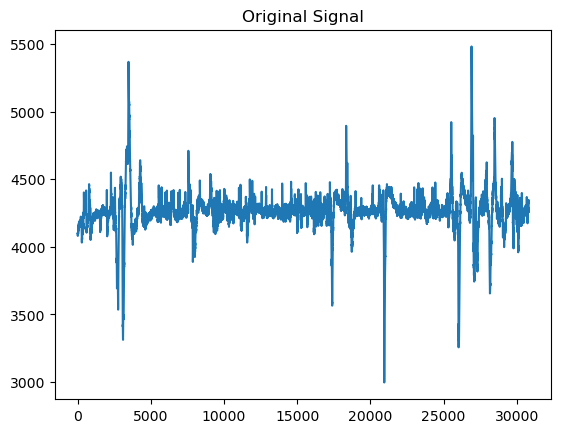

In [45]:
# Plot the noisy signal
plt.figure()
plt.plot(signal)
plt.title('Original Signal')

In [46]:
# Add Poisson noise to the signal
lambda_ = 5  # parameter of the Poisson distribution
noisy_signal = np.random.poisson(lambda_ * np.abs(signal)) * np.sign(signal)

Text(0.5, 1.0, 'Noisy signal')

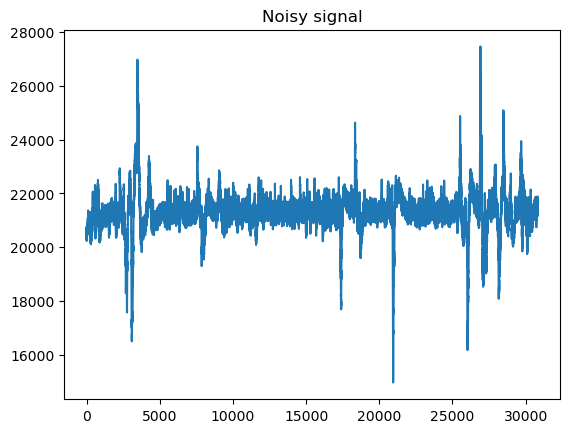

In [47]:
# Plot the noisy signal
plt.figure()
plt.plot(noisy_signal)
plt.title('Noisy signal')

In [48]:
print(len(noisy_signal))
print(len(signal))
print(np.isnan(noisy_signal).any())
print(np.isnan(signal).any())

30813
30813
False
False


In [49]:
# Define the Haar wavelet filter
filter_level = 4

# Filter the noisy signal using the Haar wavelet filter
coeffs = wavedec(noisy_signal, 'haar', level=filter_level)
coeffs_flat = np.concatenate(coeffs[1:])
coeffs_flat = (coeffs_flat - np.mean(coeffs_flat)) / np.std(coeffs_flat)
coeffs[1:] = np.split(coeffs_flat, np.cumsum([len(c) for c in coeffs[1:-1]]))
filtered_signal = waverec(coeffs, 'haar')
filtered_signal = filtered_signal[:len(signal)]

In [50]:
mse = mean_squared_error(noisy_signal, filtered_signal)
psnr = 20 * log10(max(noisy_signal)) - 10 * log10(mse)
snr = 10 * log10(np.sum(noisy_signal**2) / np.sum((noisy_signal - filtered_signal)**2))

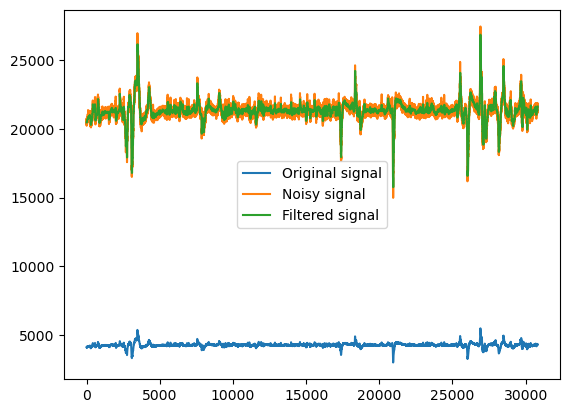

PSNR: 43.34242929820357
MSE: 34911.485518606976
SNR: 41.15104079129804


In [51]:
# Plot the original, noisy, and filtered signals
plt.plot(signal, label='Original signal')
plt.plot(noisy_signal, label='Noisy signal')
plt.plot(filtered_signal, label='Filtered signal')
plt.legend()
plt.show()

# Print the PSNR, MSE, and SNR values
print("PSNR:", psnr)
print("MSE:", mse)
print("SNR:", snr)

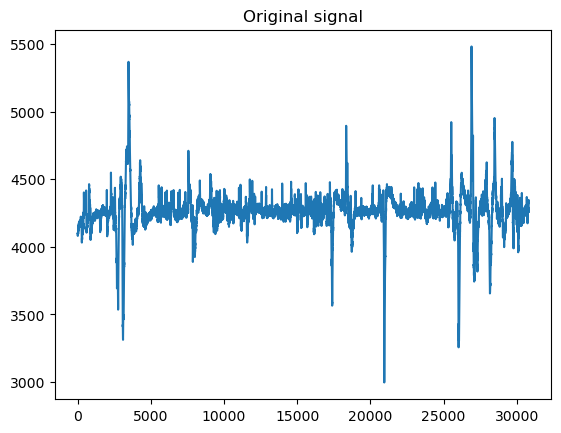

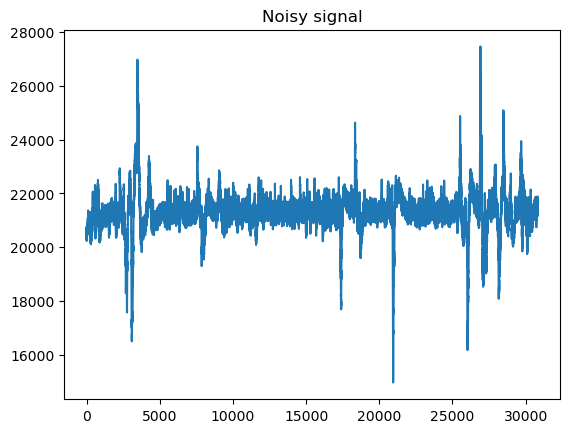

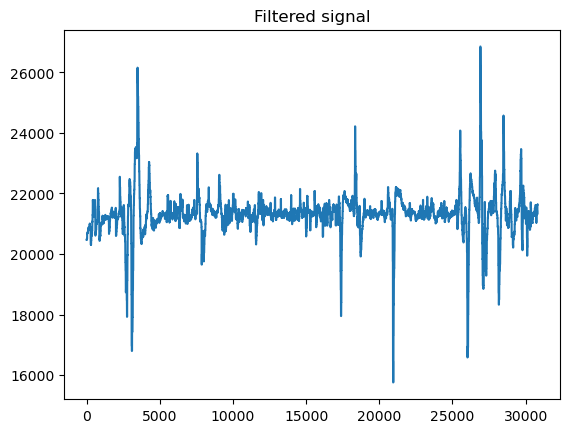

In [52]:
# Plot the original signal
plt.figure()
plt.plot(signal)
plt.title('Original signal')

# Plot the noisy signal
plt.figure()
plt.plot(noisy_signal)
plt.title('Noisy signal')

# Plot the filtered signal
plt.figure()
plt.plot(filtered_signal)
plt.title('Filtered signal')

# Show all the plots
plt.show()